## 1. SORU: Sınav sonuçları normal dağılımlı mıdır? Değilse normal dağılıma sahip hale getirmek için ne yapabiliriz?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('StudentsPerformance.csv')
df.columns = ['cinsiyet', 'koken', 'aile_egt_seviyesi', 'ogle_yemegi', 
                              'hazirlik_kursu', 'matematik_notu', 'okuma_notu', 'yazma_notu']
df.head()

,cinsiyet,koken,aile_egt_seviyesi,ogle_yemegi,hazirlik_kursu,matematik_notu,okuma_notu,yazma_notu
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Sınav sonuçlarının dağılımına bakalım:

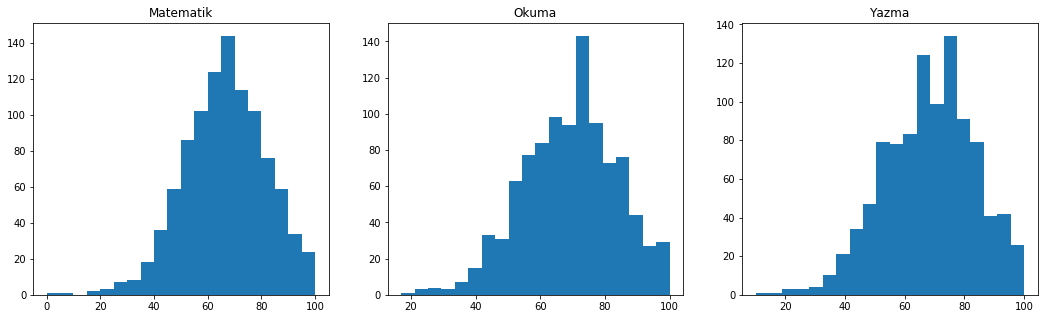

In [12]:
plt.figure(figsize = (18,5))

plt.subplot(1,3,1)
plt.hist(df['matematik_notu'], bins = 20)
plt.title('Matematik')

plt.subplot(1,3,2)
plt.hist(df['okuma_notu'], bins = 20)
plt.title('Okuma')

plt.subplot(1,3,3)
plt.hist(df['yazma_notu'], bins = 20)
plt.title('Yazma')

plt.show()

Normal dağılıma yakın bir dağılım gösteriyorlar

Bunu test etmek için jarque_bera ve normaltest uygulayalım:

In [86]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = '{:.5f}'.format

ozellikler = ["matematik_notu","okuma_notu", "yazma_notu"]
dagilim_testleri = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for ozellik in ozellikler:
    jb_stats = jarque_bera(df[ozellik])
    norm_stats = normaltest(df[ozellik])
    dagilim_testleri = dagilim_testleri.append({"ozellik": ozellik,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,matematik_notu,7.69303,0.02135,7.68494,0.02144
1,okuma_notu,11.38330,0.00337,11.11741,0.00385
2,yazma_notu,13.98509,0.00092,13.60645,0.00111


şimdi loglarını alarak bakalım:

In [17]:
pd.options.display.float_format = '{:.5f}'.format

ozellikler = ["matematik_notu","okuma_notu", "yazma_notu"]
dagilim_testleri = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for ozellik in ozellikler:
    jb_stats = jarque_bera(np.log(df[ozellik]))
    norm_stats = normaltest(np.log(df[ozellik]))
    dagilim_testleri = dagilim_testleri.append({"ozellik": ozellik,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,matematik_notu,nan,nan,nan,nan
1,okuma_notu,495.12732,0.00000,209.77151,0.00000
2,yazma_notu,1410.93701,0.00000,318.96921,0.00000


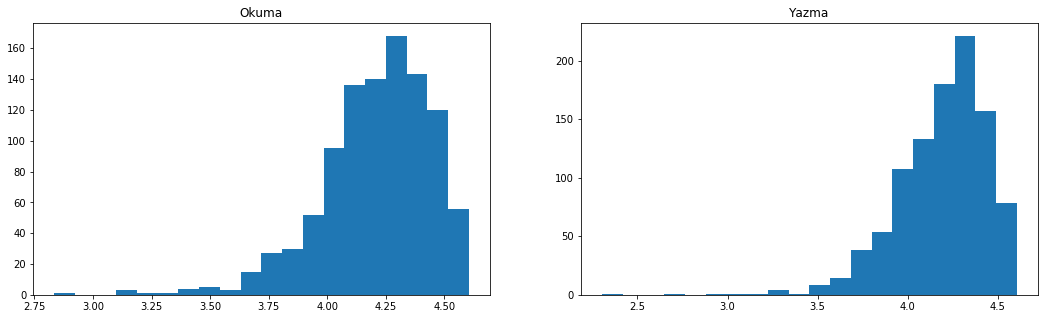

In [23]:
plt.figure(figsize = (18,5))

plt.subplot(1,2,1)
plt.hist(np.log(df['okuma_notu']), bins = 20)
plt.title('Okuma')

plt.subplot(1,2,2)
plt.hist(np.log(df['yazma_notu']), bins = 20)
plt.title('Yazma')

plt.show()



In [47]:
x = df[ df.matematik_notu == 0]
x

,cinsiyet,koken,aile_egt_seviyesi,ogle_yemegi,hazirlik_kursu,matematik_notu,okuma_notu,yazma_notu
59,female,group C,some high school,free/reduced,none,0,17,10


In [35]:
# log 0 sonsuza gittiğinden patlıyor log alma işi, bu sıfırı değiştirmeliyiz:

In [54]:
df.loc[df.matematik_notu == 0, 'matematik_notu'] = df.matematik_notu.mean()
df['matematik_notu'][59]


66.089

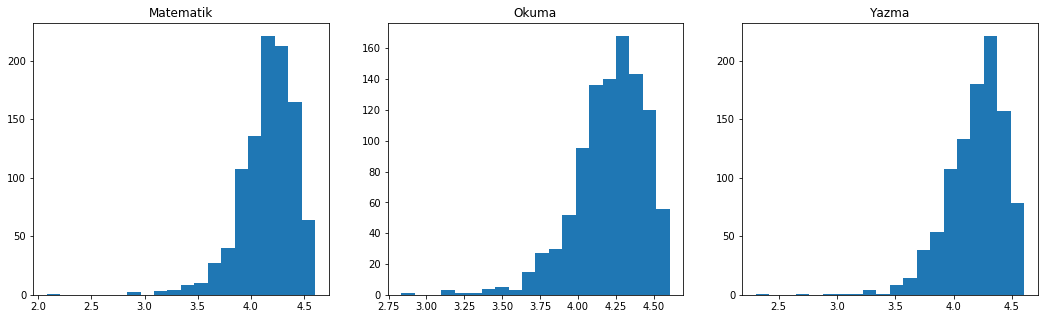

In [55]:
plt.figure(figsize = (18,5))


plt.subplot(1,3,1)
plt.hist(np.log(df['matematik_notu']), bins = 20)
plt.title('Matematik')

plt.subplot(1,3,2)
plt.hist(np.log(df['okuma_notu']), bins = 20)
plt.title('Okuma')

plt.subplot(1,3,3)
plt.hist(np.log(df['yazma_notu']), bins = 20)
plt.title('Yazma')

plt.show()

Şimdi bu logları test edelim:

In [56]:
pd.options.display.float_format = '{:.5f}'.format

ozellikler = ["matematik_notu","okuma_notu", "yazma_notu"]
dagilim_testleri = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for ozellik in ozellikler:
    jb_stats = jarque_bera(np.log(df[ozellik]))
    norm_stats = normaltest(np.log(df[ozellik]))
    dagilim_testleri = dagilim_testleri.append({"ozellik": ozellik,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,matematik_notu,1740.23098,0.00000,335.75475,0.00000
1,okuma_notu,495.12732,0.00000,209.77151,0.00000
2,yazma_notu,1410.93701,0.00000,318.96921,0.00000


In [57]:
# değerler yine normal dağılımı göstermiyor, p value sıfır geldi.

### normalleştirme ve standartlaştırma yapacağız

In [58]:
from sklearn.preprocessing import normalize

df["norm_matematik"] = normalize(np.array(df["matematik_notu"]).reshape(1,-1)).reshape(-1,1)
df["norm_okuma"] = normalize(np.array(df["okuma_notu"]).reshape(1,-1)).reshape(-1,1)
df["norm_yazma"] = normalize(np.array(df["yazma_notu"]).reshape(1,-1)).reshape(-1,1)
normal_ozellikler=["matematik_notu","norm_matematik","okuma_notu","norm_okuma",
                    "yazma_notu","norm_yazma"]


print('Minimum Değer\n-----------------',)
print(df[normal_ozellikler].min())
print('\nMaksimum Değer\n-----------------',)
print(df[normal_ozellikler].max())

Minimum Değer
-----------------
matematik_notu    8.00000
norm_matematik    0.00373
okuma_notu       17.00000
norm_okuma        0.00760
yazma_notu       10.00000
norm_yazma        0.00454
dtype: float64

Maksimum Değer
-----------------
matematik_notu   100.00000
norm_matematik     0.04662
okuma_notu       100.00000
norm_okuma         0.04473
yazma_notu       100.00000
norm_yazma         0.04535
dtype: float64


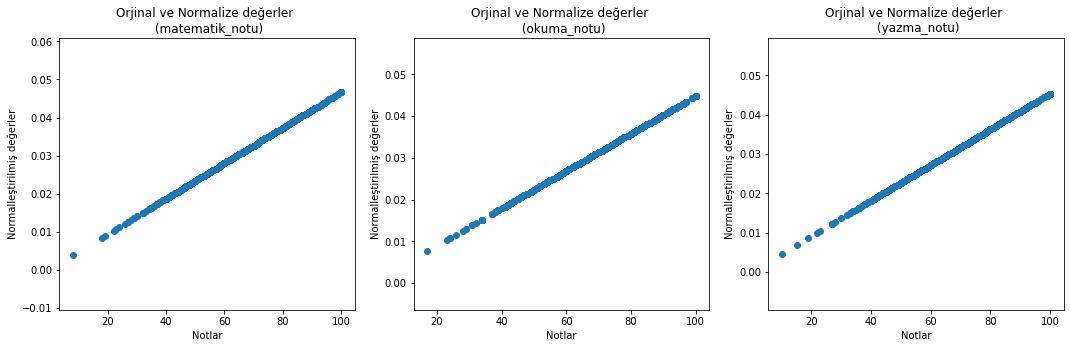

In [59]:
plt.figure(figsize=(18,5))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.scatter(df[normal_ozellikler[2*i]], df[normal_ozellikler[2*i+1]])
    plt.title("Orjinal ve Normalize değerler \n ({})".format(normal_ozellikler[2*i]))
    plt.xlabel("Notlar")
    plt.ylabel("Normalleştirilmiş değerler")

plt.show()

### Soru 2 : Üç sınav sonucunu tek bir değişkende, hedef değişkeni olarak tutmak istiyoruz. Bunun için üç sınavın ortalamasını içeren yeni bir değişken tanımlayın. Bu yeni değişkenin ortalamasının normal dağılımlı olup olmadığını test edin. Eğer normal dağılıma sahip değilse dönüşüm yaparak normal dağılımlı hale getirmeye çalışın ve dönüşümün sonucunu test edin.

In [71]:
df['ortalama_not'] = (df['matematik_notu'] + df['okuma_notu'] + df['yazma_notu'])/3
df['ortalama_not'].head()

0   72.66667
1   82.33333
2   92.66667
3   49.33333
4   76.33333
Name: ortalama_not, dtype: float64

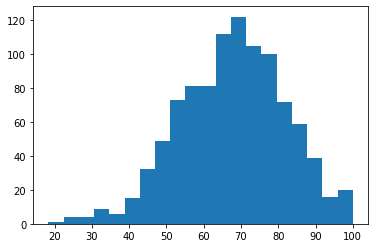

In [72]:
plt.hist(df['ortalama_not'], bins = 20)
plt.show()

Test uygulayalım:

In [73]:
dagilim_testi = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])
jb_stats = jarque_bera((df['ortalama_not']))
norm_stats = normaltest(df['ortalama_not'])
dagilim_testi = dagilim_testi.append({"ozellik": 'ortalama not',
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testi

,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,ortalama not,10.93329,0.00423,10.69383,0.00476


In [76]:
# normalize edelim:

df["norm_ortalama_not"] = normalize(np.array(df["ortalama_not"]).reshape(1,-1)).reshape(-1,1)
normal_ozellikler=["ortalama_not","norm_ortalama_not"]

print('Minimum Değer\n-----------------',)
print(df[normal_ozellikler].min())
print('\nMaksimum Değer\n-----------------',)
print(df[normal_ozellikler].max())

Minimum Değer
-----------------
ortalama_not        18.33333
norm_ortalama_not    0.00837
dtype: float64

Maksimum Değer
-----------------
ortalama_not        100.00000
norm_ortalama_not     0.04566
dtype: float64


In [77]:
# tekrar test edelim:

dagilim_testi = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])
jb_stats = jarque_bera((df['norm_ortalama_not']))
norm_stats = normaltest(df['norm_ortalama_not'])
dagilim_testi = dagilim_testi.append({"ozellik": 'norm ortalama not',
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testi

,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,norm ortalama not,10.93329,0.00423,10.69383,0.00476


## P value değişmedi ??

## SORU 3: Bir önceki soruda oluşturduğumuz hedef değişkeni ile hangi değişkenler ilişkili görünüyor? Eğer amacımız sınav başarısını belirleyen etkenleri açıklamak olsaydı hangi değişkenleri veri kümemizde tutmamız gerekirdi?

In [79]:
df.head()

,cinsiyet,koken,aile_egt_seviyesi,ogle_yemegi,hazirlik_kursu,matematik_notu,okuma_notu,yazma_notu,norm_matematik,norm_okuma,norm_yazma,ortalama_not,norm_ortalama_not
0,female,group B,bachelor's degree,standard,none,72.00000,72,74,0.03356,0.03221,0.03356,72.66667,0.03318
1,female,group C,some college,standard,completed,69.00000,90,88,0.03217,0.04026,0.03991,82.33333,0.03759
2,female,group B,master's degree,standard,none,90.00000,95,93,0.04195,0.04250,0.04218,92.66667,0.04231
3,male,group A,associate's degree,free/reduced,none,47.00000,57,44,0.02191,0.02550,0.01995,49.33333,0.02252
4,male,group C,some college,standard,none,76.00000,78,75,0.03543,0.03489,0.03401,76.33333,0.03485


In [80]:
df.corr()
# sadece nümerik sütunları eşliyor. Kategorik lazım bize;

,matematik_notu,okuma_notu,yazma_notu,norm_matematik,norm_okuma,norm_yazma,ortalama_not,norm_ortalama_not
matematik_notu,1.00000,0.80973,0.79356,1.00000,0.80973,0.79356,0.91420,0.91420
okuma_notu,0.80973,1.00000,0.95460,0.80973,1.00000,0.95460,0.96984,0.96984
yazma_notu,0.79356,0.95460,1.00000,0.79356,0.95460,1.00000,0.96477,0.96477
norm_matematik,1.00000,0.80973,0.79356,1.00000,0.80973,0.79356,0.91420,0.91420
norm_okuma,0.80973,1.00000,0.95460,0.80973,1.00000,0.95460,0.96984,0.96984
norm_yazma,0.79356,0.95460,1.00000,0.79356,0.95460,1.00000,0.96477,0.96477
ortalama_not,0.91420,0.96984,0.96477,0.91420,0.96984,0.96477,1.00000,1.00000
norm_ortalama_not,0.91420,0.96984,0.96477,0.91420,0.96984,0.96477,1.00000,1.00000


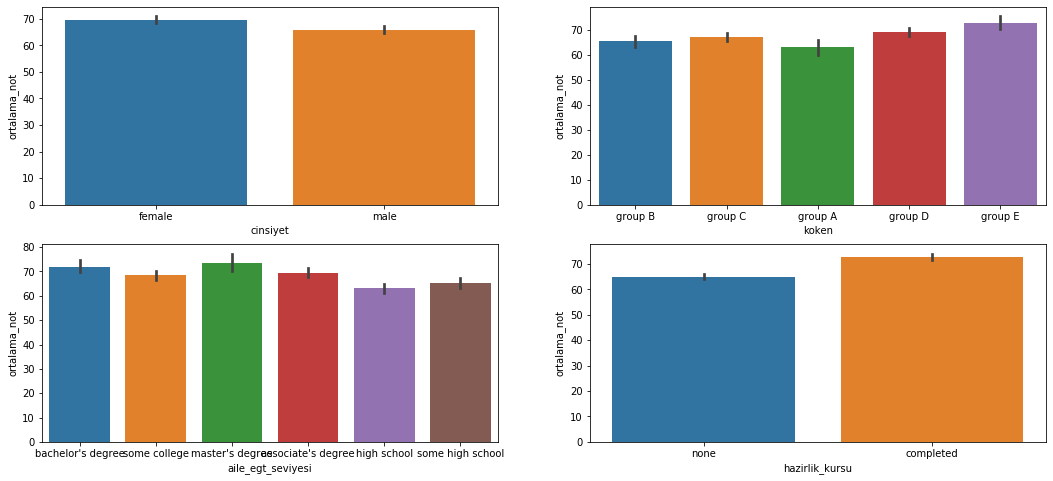

In [85]:
plt.figure(figsize=(18,8))

plt.subplot(2,2,1)
sns.barplot(df["cinsiyet"], df["ortalama_not"])
plt.subplot(2,2,2)
sns.barplot(df["koken"], df["ortalama_not"])
plt.subplot(2,2,3)
sns.barplot(df["aile_egt_seviyesi"], df["ortalama_not"])
plt.subplot(2,2,4)
sns.barplot(df["hazirlik_kursu"], df["ortalama_not"])

plt.show()


In [89]:
import scipy.stats as sts
ttest_cinsiyet=sts.ttest_ind(df[df["cinsiyet"]=="female"]["ortalama_not"], 
                             df[df["cinsiyet"]=="male"]["ortalama_not"])
ttest_yemek=sts.ttest_ind(df[df["ogle_yemegi"]=="standard"]["ortalama_not"], 
                             df[df["ogle_yemegi"]=="free/reduced"]["ortalama_not"])
ttest_kurs=sts.ttest_ind(df[df["hazirlik_kursu"]=="none"]["ortalama_not"], 
                             df[df["hazirlik_kursu"]=="completed"]["ortalama_not"])
ttest_aile=sts.ttest_ind(df[df["hazirlik_kursu"]=="none"]["ortalama_not"], 
                             df[df["hazirlik_kursu"]=="completed"]["ortalama_not"])
ttest_koken=sts.ttest_ind(df[df["hazirlik_kursu"]=="none"]["ortalama_not"], 
                             df[df["hazirlik_kursu"]=="completed"]["ortalama_not"])

display("CİNSİYET", ttest_cinsiyet)
display("YEMEK", ttest_yemek)
display("HAZIRLIK KURSU", ttest_kurs)
display("AİLE EĞİTİİM", ttest_aile)
display("KÖKEN", ttest_koken)

'CİNSİYET'

Ttest_indResult(statistic=4.240700482473363, pvalue=2.4351791255484407e-05)

'YEMEK'

Ttest_indResult(statistic=9.554221645742766, pvalue=9.309015705628212e-21)

'HAZIRLIK KURSU'

Ttest_indResult(statistic=-8.397252107816769, pvalue=1.5538861955646217e-16)

'AİLE EĞİTİİM'

Ttest_indResult(statistic=-8.397252107816769, pvalue=1.5538861955646217e-16)

'KÖKEN'

Ttest_indResult(statistic=-8.397252107816769, pvalue=1.5538861955646217e-16)

In [90]:
# hepsi çok küçük geldi